In [160]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from matplotlib.colors import ListedColormap
from sklearn.metrics import accuracy_score
from collections import Counter
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier


## Analysing Dataset

In [38]:
# Prepocessing data
# Source lecture DAT200. File: rawDataInspection_01.py

In [48]:
# read training data
df = pd.read_csv('CA3-train.csv')

In [40]:
# Search for missing values
missing = np.asarray(df.isnull().sum())
if missing.any():
    print("Dataset has missing values")
else:
    print('No missing values!')

No missing values!


If there were missing values we would need to handle that, before continuing our analysis.\
This could be done for example by filling in the mean for the respective feature.

Before splitting our data we need to assign the feature values and the class labels to X and y respectively.

In [199]:
# features index
c_first = 1
c_last = 25    # not included
# Assign features to X matrix. Assign to X_train and y_train
X, y = df.iloc[:, c_first:c_last].values, df.iloc[:, 25]
print(f"Selected features:", df.iloc[:, c_first:c_last].columns)

Selected features: Index(['f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11',
       'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20', 'f21',
       'f22', 'f23', 'f24'],
      dtype='object')


In [200]:
# Default parameters. Our initial test
seed = 1
test_size = 0.05

# Splitting data with default parameters
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, stratify=y,
                                                    random_state=seed)

# Standardizing our data to make algorithms behave better
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [201]:
def fit_test_size(classifier, X, y, test_size_list, seed, feature_extraction=None, n_components=None):
    # Accuracy for different test_train_splits
    for size in test_size_list:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=size, stratify=y,
                                                            random_state=seed)
        X_train_std = sc.fit_transform(X_train)
        X_test_std = sc.transform(X_test)
        if feature_extraction == PCA:
            # Dimensionality reduction through PCA
            pca = PCA(n_components=n_components, random_state=1)
            X_train_pca = pca.fit_transform(X_train_std, y_train)
            X_test_pca = pca.transform(X_test_std)
            classifier.fit(X_train_pca, y_train)
            y_pred = classifier.predict(X_test_pca)
            print(f'Misclassified examples PCA: {(y_test != y_pred).sum()}')
            print('Accuracy PCA: {:.3}'.format(classifier.score(X_test_pca, y_test)))
            print(f'Test size: {size}')
        elif feature_extraction == LDA:
            lda = LDA(n_components=n_components)
            X_train_lda = lda.fit_transform(X_train_std, y_train)
            X_test_lda = lda.transform(X_test_std)
            classifier.fit(X_train_lda, y_train)
            print('Accuracy LDA: {:.3}'.format(classifier.score(X_test_lda, y_test)))
            print(f'Test size: {size}')
                
        else:
            classifier.fit(X_train_std, y_train)
            y_pred = classifier.predict(X_test_std)
            print(f'Misclassified examples: {(y_test != y_pred).sum()}')
            print('Training Accuracy: {:.3}'.format(classifier.score(X_train_std, y_train)))
            print('Accuracy: {:.3}'.format(classifier.score(X_test_std, y_test)))
            print(f'Test size: {size}')

**We test the following algorithms to find our best classifier**
   - Perceptron
   - Logistic regression
   - Decision trees
   - Random forest
   - Support Vector machine
   - K-nearest neighbors

Furthermore we train our classifiers using multiple test-train splits and experimenting with different parameters. We choose to only include code for our best performing classifier. Which in our case turns out to be K-nearest neighbors.

In [269]:
#### Fit Random forest and calculate accuracy for different train_test_splits
test_size_list = [0.6, 0.3, 0.1, 0.05, 0.01]
knn = KNeighborsClassifier(n_neighbors=7, weights='distance',
                           p=2, metric='minkowski', n_jobs=-1)

fit_test_size(knn, X, y, test_size_list, seed)

Misclassified examples: 2131
Training Accuracy: 1.0
Accuracy: 0.5
Test size: 0.6
Misclassified examples: 1014
Training Accuracy: 1.0
Accuracy: 0.525
Test size: 0.3
Misclassified examples: 314
Training Accuracy: 1.0
Accuracy: 0.558
Test size: 0.1
Misclassified examples: 146
Training Accuracy: 1.0
Accuracy: 0.59
Test size: 0.05
Misclassified examples: 21
Training Accuracy: 1.0
Accuracy: 0.708
Test size: 0.01


KNN with 7 neighbors yields the best result with an accuracy of 0.708

## Predicting class labels using the best classifier

Using KNN with the best input parameters we predict the class labels of the training data

In [266]:
# Default parameters
seed = 1
test_size = 0.01

# Splitting data with default parameters
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, stratify=y,
                                                    random_state=seed)

# Standardizing our data to make algorithms behave better
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [261]:
knn.fit(X_train_std, y_train)
y_pred = knn.predict(X_test_std)
len(y_pred)

72

In [262]:
# Count predicted class label and share of total
c = Counter(y_pred)
print(c)
for i in range(3):
    print("Class", i, ":", c[i])
    print("Share of total: {:.3}".format(c[i]/sum(c.values())))

Counter({1.0: 31, 0.0: 26, 2.0: 15})
Class 0 : 26
Share of total: 0.361
Class 1 : 31
Share of total: 0.431
Class 2 : 15
Share of total: 0.208


In [263]:
# Count actual class label and share of total
c2 = Counter(y_test)
print(c2)
for i in range(3):
    print("Class", i, ":", c2[i])
    print("Share of total: {:.3}".format(c2[i]/sum(c2.values())))

Counter({1.0: 28, 0.0: 25, 2.0: 19})
Class 0 : 25
Share of total: 0.347
Class 1 : 28
Share of total: 0.389
Class 2 : 19
Share of total: 0.264


In [264]:
print(f'Misclassified examples: {(y_test != y_pred).sum()}')

Misclassified examples: 21


Overall our classifier does a decent job in predicting the total share of different classes with class 1 as the largest and class 2 as the smallest. However our classifier predicts too few examples of class 2 and too many of class 1 and class 0.

### Looking into the data

comment: Might skip this in final version

* Search for correlations
* Look for outliers
* Visualize

In [20]:
df_X = df.iloc[:, 1:25]

In [21]:
# =============================================================================
# Descriptive statistics
# =============================================================================
df_X.describe()
#df.iloc[:, 16].describe()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24
count,7108.000000,7108.000000,7108.000000,7108.000000,7108.000000,7108.000000,7108.000000,7108.000000,7108.000000,7108.000000,...,7108.000000,7108.000000,7108.000000,7108.000000,7108.000000,7108.000000,7108.000000,7108.000000,7108.000000,7108.000000
mean,1.202026,0.804586,0.401941,156.874930,166.643360,196.047271,168.302195,238.272512,230.066717,219.825159,...,0.398284,530.048818,0.224254,297.630979,0.221186,0.331006,0.030905,5.881964,4.886747,2.899268
std,0.493933,0.396547,0.490325,80.914806,74.588417,107.521931,77.616408,207.299347,207.017288,198.373088,...,0.707898,1927.718921,0.417120,699.293958,0.376378,0.451033,0.027579,1.536845,2.878474,1.860700
min,1.000000,0.000000,0.000000,0.000000,20.000000,20.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,-4.325500,-1.206000,0.000500,2.000000,1.000000,1.000000
25%,1.000000,1.000000,0.000000,99.000000,119.000000,119.000000,119.000000,111.037400,105.016925,88.459000,...,0.000000,0.000000,0.000000,0.000000,0.073800,0.124575,0.015300,5.000000,2.000000,1.000000
50%,1.000000,1.000000,0.000000,139.000000,159.000000,179.000000,159.000000,173.704850,167.636150,150.273100,...,0.000000,0.000000,0.000000,0.000000,0.147800,0.220600,0.023400,6.000000,4.000000,2.000000
75%,1.000000,1.000000,1.000000,199.000000,199.000000,239.000000,199.000000,289.366625,281.537275,284.385325,...,1.000000,223.750000,0.000000,298.000000,0.259100,0.354800,0.036900,7.000000,7.000000,4.000000
max,8.000000,1.000000,1.000000,1036.000000,1036.000000,1628.000000,977.000000,1924.134700,1924.134700,1070.361600,...,5.000000,35448.000000,1.000000,11140.000000,4.491700,4.491700,0.362300,10.000000,10.000000,10.000000


In [22]:
# Check for positive values f16

positive_f16 = np.where(df['f16']>0, True, False)
# count True
positive_f16.sum()

2145

In [23]:
# Drop rows with zero values

extract_positive_f16 = df[df['f16']>0]['f16']
extract_positive_f16

1        5290.0
3         397.0
6        2248.0
11        358.0
12       2306.0
         ...   
7083     1569.0
7089      596.0
7090    10556.0
7099      517.0
7102      477.0
Name: f16, Length: 2145, dtype: float64

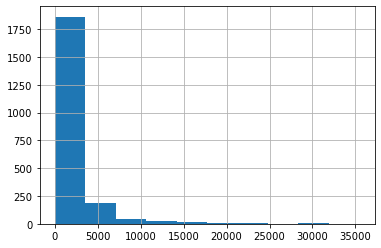

In [24]:
# Histogram positive f16
extract_positive_f16.hist()

In [25]:
# Descriptive statistics for posive f16

extract_positive_f16.describe()

count     2145.000000
mean      1756.450816
std       3187.966249
min         20.000000
25%        318.000000
50%        676.000000
75%       1670.000000
max      35448.000000
Name: f16, dtype: float64

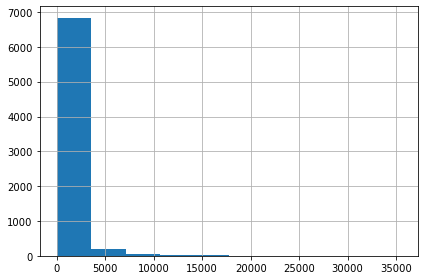

In [26]:
# =============================================================================
# Histograms
# =============================================================================

df.iloc[:, 16].hist()
plt.tight_layout()
plt.show()

Notes AH: Possible outliers f16, very high max relative to the rest.
Also a lot of zero values more than two-thirds. Consider dropping the column.

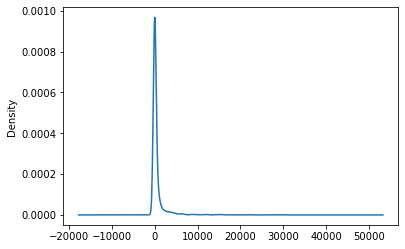

In [27]:
# =============================================================================
# Density plots
# =============================================================================

df['f16'].plot(kind='density')
plt.show()

In [28]:
# Sort values for f16 in descending order

df['f16'].sort_values(ascending=False)[0:50]

4366    35448.0
6861    35448.0
3295    30016.0
5336    30016.0
3089    30016.0
3764    30016.0
1108    24987.0
4808    22514.0
1539    22218.0
2019    22218.0
3997    22218.0
2481    22218.0
2160    17872.0
4439    17872.0
4162    17872.0
1876    17019.0
2058    17019.0
6419    15604.0
6589    15604.0
332     15604.0
2150    15319.0
3985    15319.0
2888    15319.0
1597    15319.0
6767    15319.0
4959    15319.0
1870    14971.0
2067    14824.0
4923    14824.0
6088    14824.0
62      14824.0
4543    14146.0
2246    14146.0
6681    14146.0
343     14146.0
1084    14146.0
5137    14146.0
929     14047.0
3443    12433.0
680     12433.0
4793    12433.0
4609    12432.0
5079    12432.0
5633    12364.0
4887    12364.0
4460    12185.0
1720    11988.0
1699    11988.0
1639    11655.0
66      11655.0
Name: f16, dtype: float64

In [29]:
df.sort_values(by=['f16'], ascending=False)[0:30]

,ID,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f16,f17,f18,f19,f20,f21,f22,f23,f24,label
4366,4366,2.0,1.0,0.0,139.0,179.0,378.0,139.0,132.4434,154.6165,...,35448.0,0.0,2683.0,0.4915,0.4105,0.0266,7.0,10.0,7.0,2.0
6861,6861,2.0,1.0,0.0,139.0,179.0,378.0,139.0,217.0190,401.4038,...,35448.0,0.0,2683.0,0.4105,0.4095,0.0266,7.0,10.0,7.0,2.0
5336,5336,1.0,1.0,1.0,139.0,258.0,258.0,139.0,246.5325,213.0475,...,30016.0,0.0,1751.0,0.4250,0.2110,0.0080,6.0,10.0,5.0,2.0
3295,3295,1.0,1.0,1.0,139.0,258.0,258.0,139.0,243.9021,52.6925,...,30016.0,0.0,1751.0,0.2855,0.1435,0.0306,6.0,10.0,5.0,2.0
3764,3764,1.0,1.0,1.0,139.0,258.0,258.0,139.0,102.2851,430.9878,...,30016.0,0.0,1751.0,0.3850,0.4250,0.0080,6.0,10.0,5.0,2.0
3089,3089,1.0,1.0,1.0,139.0,258.0,258.0,139.0,334.6349,94.5119,...,30016.0,0.0,1751.0,0.3380,0.4250,0.0209,6.0,10.0,5.0,2.0
1108,1108,1.0,0.0,0.0,319.0,120.0,120.0,379.0,119.8770,1600.9859,...,24987.0,0.0,0.0,1.4535,0.9480,0.0030,9.0,10.0,9.0,1.0
4808,4808,1.0,0.0,0.0,120.0,379.0,379.0,359.0,384.7184,190.9830,...,22514.0,0.0,817.0,1.0020,2.0375,0.0110,9.0,10.0,4.0,1.0
3997,3997,1.0,1.0,1.0,339.0,179.0,179.0,379.0,186.3934,150.1874,...,22218.0,0.0,918.0,-1.1130,0.3335,0.0055,5.0,7.0,5.0,1.0
2019,2019,1.0,1.0,1.0,339.0,179.0,179.0,379.0,84.0729,122.4091,...,22218.0,0.0,918.0,0.7725,1.4375,0.0030,5.0,7.0,5.0,1.0


Note: Skip the six first datapoints from the sorting above

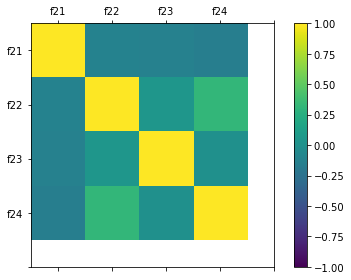

In [30]:
# =============================================================================
# Plot correlation matrix
# =============================================================================

# plot correlation matrix for the first four features
df_sub = df.iloc[:, 21:25]
correlations = df_sub.corr()

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0, 5, 1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(list(df_sub.columns))
ax.set_yticklabels(list(df_sub.columns))
plt.tight_layout()
plt.show()

In [31]:
correlations

,f21,f22,f23,f24
f21,1.000000,-0.116271,-0.120498,-0.141178
f22,-0.116271,1.000000,0.051113,0.321577
f23,-0.120498,0.051113,1.000000,0.007275
f24,-0.141178,0.321577,0.007275,1.000000


In [32]:
corr_f15f16 = df.iloc[:, [15, 16]].corr()
corr_f15f16

,f15,f16
f15,1.000000,0.616109
f16,0.616109,1.000000


In [33]:
# correlations all f16
corr_all = df_X.corr()
corr_all.iloc[:, 19]

f1    -0.019492
f2    -0.009851
f3     0.013584
f4     0.147898
f5     0.180280
f6     0.122709
f7     0.152886
f8     0.026384
f9    -0.030065
f10   -0.008372
f11    0.068333
f12    0.044116
f13    0.131229
f14    0.201139
f15    0.034671
f16    0.057016
f17    0.033772
f18    0.044660
f19    0.776020
f20    1.000000
f21    0.094825
f22   -0.044513
f23    0.115308
f24   -0.014021
Name: f20, dtype: float64

In [34]:
# Standardizing

sc = StandardScaler()
df_X_std = sc.fit_transform(df_X)
df_X_std


array([[-0.40904384, -2.02912558,  1.21980506, ...,  0.72753905,
        -1.0029449 , -0.48332987],
       [-0.40904384, -2.02912558,  1.21980506, ..., -0.57392001,
        -1.0029449 ,  0.59161028],
       [-0.40904384,  0.49282312,  1.21980506, ...,  1.37826859,
         0.38677826, -1.02079995],
       ...,
       [-0.40904384,  0.49282312,  1.21980506, ...,  0.07680952,
         0.03934747, -1.02079995],
       [-0.40904384,  0.49282312, -0.81980312, ..., -0.57392001,
         1.08163983,  0.59161028],
       [-0.40904384,  0.49282312, -0.81980312, ...,  0.72753905,
        -1.35037569,  0.0541402 ]])

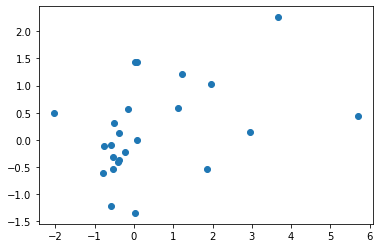

In [35]:
plt.scatter(df_X_std[14], df_X_std[15])